In [ ]:
# Step 1: Install necessary libraries
!pip install pandas seaborn matplotlib numpy

# Step 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Step 3: Load and preprocess data
uploaded = files.upload()


Saving Merged file.csv to Merged file.csv


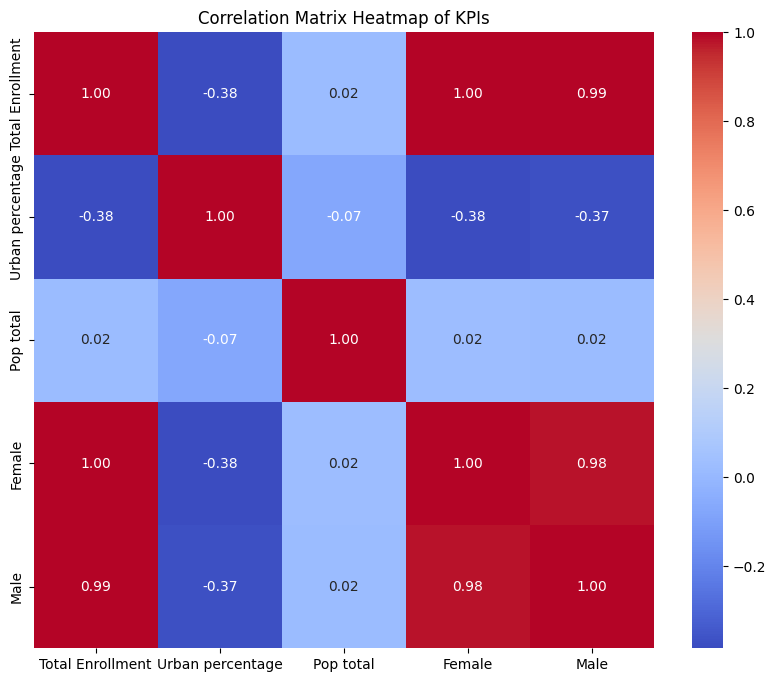


Causal Inference Analysis:
1. Observed Correlations:
Total Enrollment    1.000000
Female              0.995100
Male                0.994812
Pop total           0.020170
Urban percentage   -0.380061
Name: Total Enrollment, dtype: float64

2. Potential Confounders:
- Economic development level
- Government education spending
- Cultural attitudes towards education
- Infrastructure quality
- Demographic distribution

3. Causal Considerations:
While correlations show relationships, causation requires:
- Temporal precedence (cause precedes effect)
- Elimination of alternative explanations
- Controlled experiments or natural experiments
- Consideration of counterfactual scenarios

4. Regression Analysis (Example):
                            OLS Regression Results                            
Dep. Variable:       Total Enrollment   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-sta

In [ ]:
# Read CSV file
df = pd.read_csv(next(iter(uploaded)), encoding='utf-8-sig')

# Clean column names
df.columns = df.columns.str.replace('[%,]', '', regex=True)

# Convert percentage columns to numeric
df['Urban percentage'] = df['Urban percentage'].str.rstrip('%').astype(float)/100

# Convert numeric columns
numeric_cols = ['Total Enrollment', 'Female', 'Male', 'Rural', 'Urban',
                'Pop total', 'Pop female', 'Pop male', 'Pop rural', 'Pop urban']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

selected_columns = ['Total Enrollment', 'Urban percentage',
                   'Pop total', 'Female', 'Male']

# Create analysis dataframe
analysis_df = df[selected_columns].dropna()

# Step 4: Create correlation matrix heatmap
plt.figure(figsize=(10, 8))
corr_matrix = analysis_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap of KPIs")
plt.show()

# Step 5: Causal inference discussion
print("\nCausal Inference Analysis:")
print("1. Observed Correlations:")
print(corr_matrix['Total Enrollment'].sort_values(ascending=False))

print("\n2. Potential Confounders:")
print("- Economic development level")
print("- Government education spending")
print("- Cultural attitudes towards education")
print("- Infrastructure quality")
print("- Demographic distribution")

print("\n3. Causal Considerations:")
print("While correlations show relationships, causation requires:")
print("- Temporal precedence (cause precedes effect)")
print("- Elimination of alternative explanations")
print("- Controlled experiments or natural experiments")
print("- Consideration of counterfactual scenarios")

# Basic regression analysis
print("\n4. Regression Analysis (Example):")
import statsmodels.api as sm

X = analysis_df.drop('Total Enrollment', axis=1)
y = analysis_df['Total Enrollment']

model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())